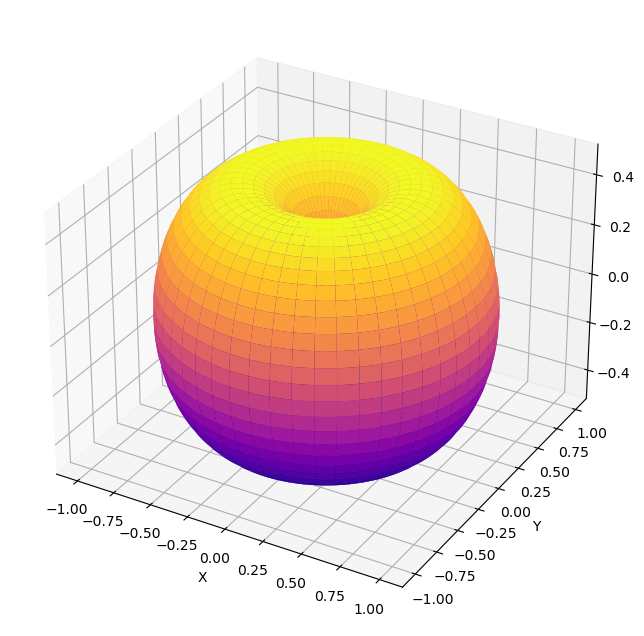

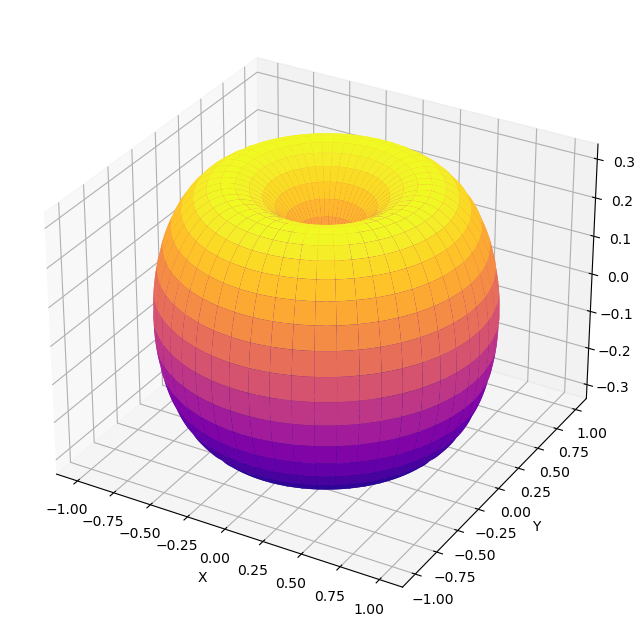

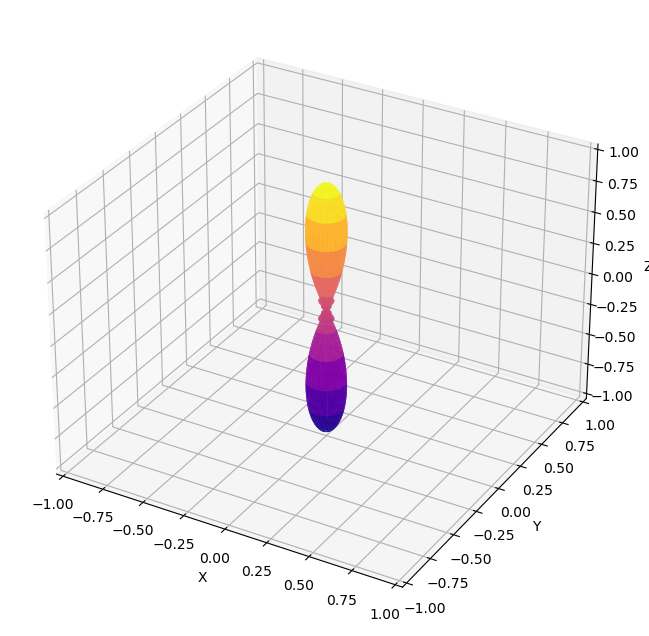

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

b = 11.859999999

def F1(theta):
    return np.sin(theta)

def F2(theta):
    return np.sin(theta)**3

def j1(x):
    return np.sin(x)/x**2 - np.cos(x)/x

def F3(theta):
    return 2*j1(b*np.sin(theta))/b/np.sin(theta)

theta = np.linspace(0.01, np.pi-0.01, 300)  # Polar angle
phi = np.linspace(0, 2 * np.pi, 300)  # Azimuthal angle
theta, phi = np.meshgrid(theta, phi)

#Calculate F1(theta, phi) and F2(theta, phi)
r1 = F1(theta)
r2 = F2(theta)
r3 = F3(theta)

#Convert spherical to Cartesian coordinates
x1 = r1 * np.sin(theta) * np.cos(phi)
y1 = r1 * np.sin(theta) * np.sin(phi)
z1 = r1 * np.cos(theta)

x2 = r2 * np.sin(theta) * np.cos(phi)
y2 = r2 * np.sin(theta) * np.sin(phi)
z2 = r2 * np.cos(theta)

x3 = r3 * np.sin(theta) * np.cos(phi)
y3 = r3 * np.sin(theta) * np.sin(phi)
z3 = r3 * np.cos(theta)

#first function
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x1, y1, z1, cmap='plasma', edgecolor='none')
#ax1.set_title('$F(\\theta,\\phi) = \\sin(\\theta)$')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

#second function
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x2, y2, z2, cmap='plasma', edgecolor='none')
#ax2.set_title('$F(\\theta,\\phi) = \\sin^3(\\theta)$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()

# third function 
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(x3/np.max(F3(theta)), y3/np.max(F3(theta)), z3/np.max(F3(theta)), cmap='plasma', edgecolor='none')
#ax3.set_title('$F(\\theta,\\phi) = \\sin^3(\\theta)$')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Fix the axes to range [-1, 1]
ax3.set_xlim([-1, 1])
ax3.set_ylim([-1, 1])
ax3.set_zlim([-1, 1])

plt.show()


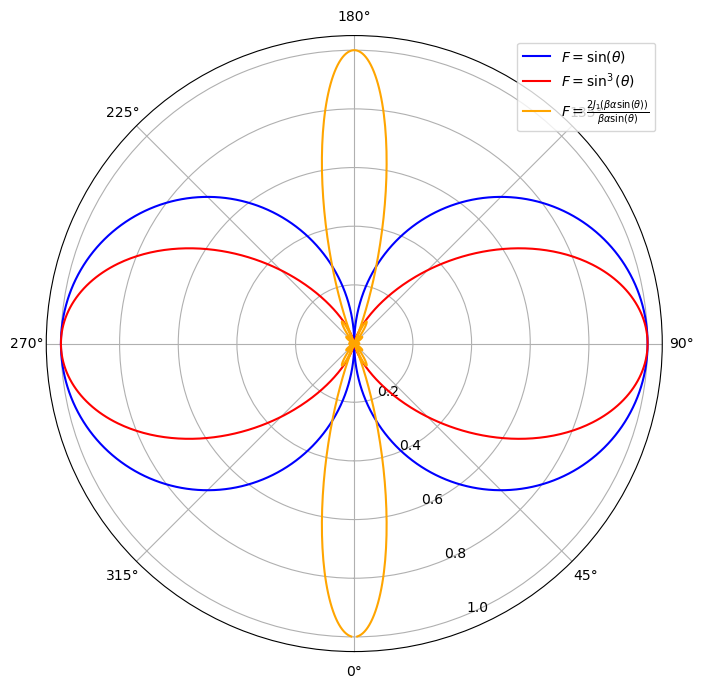

0.6665745252656077


In [3]:
# Cross Section

theta = np.linspace(0.01, 2 * np.pi-0.01, 1000)
r1 = np.abs(F1(theta))  
r2 = np.abs(F2(theta))  
r3 = np.abs(F3(theta)) 

# Create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Theta = zero to the bottom
ax.set_theta_zero_location('S')

# Plot the two functions
ax.plot(theta, r1, label='$F = \\sin(\\theta)$', color='blue')
ax.plot(theta, r2, label='$F = \\sin^3(\\theta)$', color='red')
ax.plot(theta, r3/np.max(F3(theta)), label='$F = \\frac{2J_1(\\beta\\alpha\\sin(\\theta))}{\\beta\\alpha\\sin(\\theta)}$', color='orange')

#ax.set_title('Polar Plot with Two Functions')
ax.legend()

plt.show()
print(np.max(F3(theta)))

In [4]:
indices = np.where(np.abs(r3 - 0.5) <= 0.01)
indices
theta[indices]

(3.28265539-3.00052992)*180/3.14159265358


16.16459872419511

In [5]:
indices1 = np.where(np.abs(r2 - 0.5) <= 0.003)
indices1
theta[indices1]

(2.22311753-0.91907094)*180/3.14159265358

74.71636589565976

In [8]:
import scipy.integrate as integrate

# Definir los límites de integración
a = 0  # Límite inferior
b = np.pi  # Límite superior

# Realizar la integración numérica
resultado1, error1 = integrate.quad(lambda theta: 2*np.pi*np.sin(theta) * np.abs(F1(theta))**2, a, b)
resultado2, error2 = integrate.quad(lambda theta: 2*np.pi*np.sin(theta) * np.abs(F2(theta))**2, a, b)
resultado3, error3 = integrate.quad(lambda theta: 2*np.pi*np.sin(theta) * np.abs(F3(theta))**2, a, b)

# Mostrar el resultado
print(f"El valor de la directividad 1 es: {np.round(4*np.pi/resultado1,2)}")
print(f"El valor de la directividad 2 es: {np.round(4*np.pi/resultado2,2)}")
print(f"El valor de la directividad 3 es: {np.round(4*np.pi/resultado3,2)}")



El valor de la directividad 1 es: 1.5
El valor de la directividad 2 es: 2.19
El valor de la directividad 3 es: 7.77
